In [1]:
import cv2
import os
import numpy as np
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Function to convert color image to grayscale
def convert_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Function to resize image
def resize_image(img, dim=(224, 224)):
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [4]:
print(os.getcwd())

/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds


In [5]:
# Reading and processing the images
# Initialize parameters
input_folder = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds/"
output_folder = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/dog-breeds/processed_images"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)


In [6]:
print(os.listdir(input_folder))

['rottweiler', 'dalmatian', '.DS_Store', 'german-shepherd', 'beagle', 'Preprocessing data.ipynb', 'processed_images', '.ipynb_checkpoints', 'husky', 'poodle', 'bulldog', 'labrador-retriever']


In [7]:
image_files = []
images_for_mds = []
image_labels = []

breed_folders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]

# Loop through each breed input folder
for breed_folder in breed_folders:
    breed_path = os.path.join(input_folder, breed_folder)
    image_extensions = ['.jpg', '.png', '.jpeg']
    
    breed_image_files = [f for f in os.listdir(breed_path) if any(f.lower().endswith(ext) for ext in image_extensions)]
    
    for image_file in tqdm(breed_image_files):
        img_path = os.path.join(breed_path, image_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Failed to load {img_path}")
            continue

        # Populate the image_files list with tuples
        image_files.append((breed_folder, image_file))
        
        # Convert to grayscale and resize
        gray_img = convert_to_grayscale(img)
        resized_gray_img = resize_image(gray_img)
        
        #print(resized_gray_img.shape)
        
        # Save the processed image
        breed_output_folder = os.path.join(output_folder, breed_folder)
        if not os.path.exists(breed_output_folder):
            os.makedirs(breed_output_folder)
        
        output_path = os.path.join(breed_output_folder, image_file)
        cv2.imwrite(output_path, resized_gray_img)
        
        # Preparing data for MDS on color images (resize color images)
        #color_resized_img = resize_image(img)
        images_for_mds.append(resized_gray_img.reshape(-1))
        image_labels.append(breed_folder)  # adding the breed label for each image
        

100%|██████████████████████████████████████████| 83/83 [00:00<00:00, 102.04it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 102.87it/s]


In [8]:
mds = MDS(n_components=2)
transformed_data = mds.fit_transform(images_for_mds)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [9]:
# Original shape 
breed = 'beagle'
image_name = 'beagle94.jpg'
color_img = cv2.imread(f'{breed}/{image_name}')

In [10]:
color_img.shape

(1454, 1000, 3)

In [11]:
processed = output_folder
breed = 'beagle'
image_name = 'beagle94.jpg'
grayscale = cv2.imread(f'{processed}/{breed}/{image_name}')

In [12]:
grayscale.shape

(224, 224, 3)

In [13]:
print(grayscale[:5,:5,0])
print(grayscale[:5,:5,1])
#print(grayscale[range(5),range(5),2])

[[50 46 36 28 24]
 [50 46 36 28 24]
 [51 47 36 29 23]
 [52 48 36 30 23]
 [51 49 36 31 22]]
[[50 46 36 28 24]
 [50 46 36 28 24]
 [51 47 36 29 23]
 [52 48 36 30 23]
 [51 49 36 31 22]]


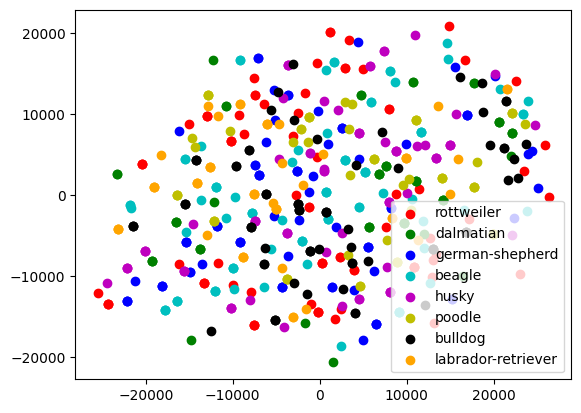

In [14]:
label_to_color = {
    'rottweiler': 'r',
    'dalmatian': 'g',
    'german-shepherd': 'b',
    'beagle': 'c',
    'husky': 'm',
    'poodle': 'y',
    'bulldog': 'k',
    'labrador-retriever': 'orange',
}

fig, ax = plt.subplots()

for point, label in zip(transformed_data, image_labels):
    color = label_to_color.get(label, 'gray')
    ax.scatter(point[0], point[1], c=color, label=label)

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


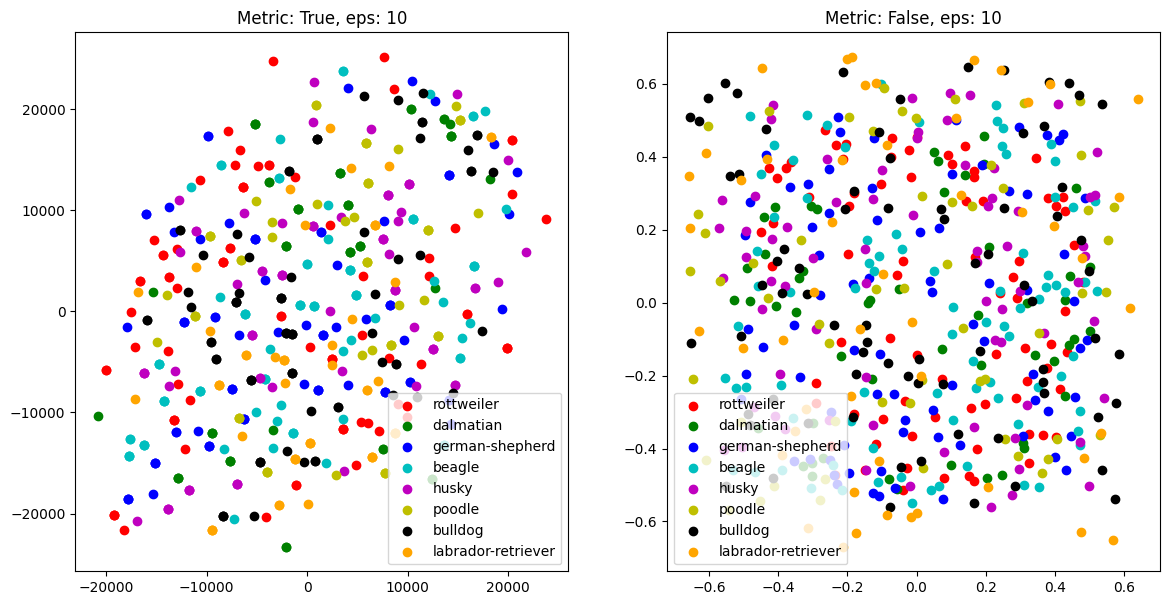

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


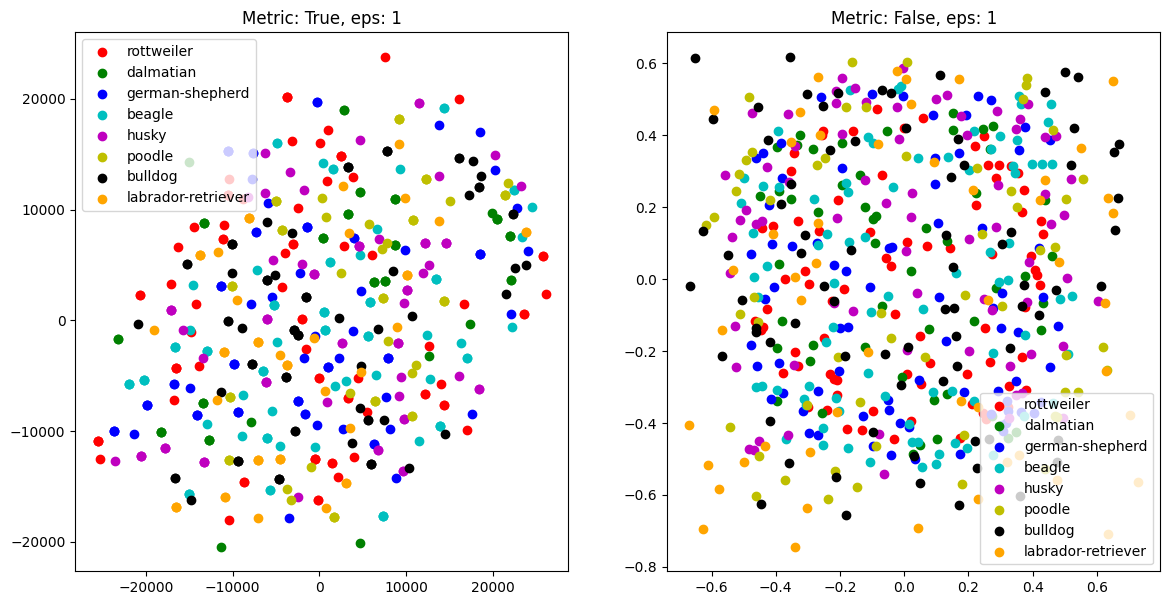

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


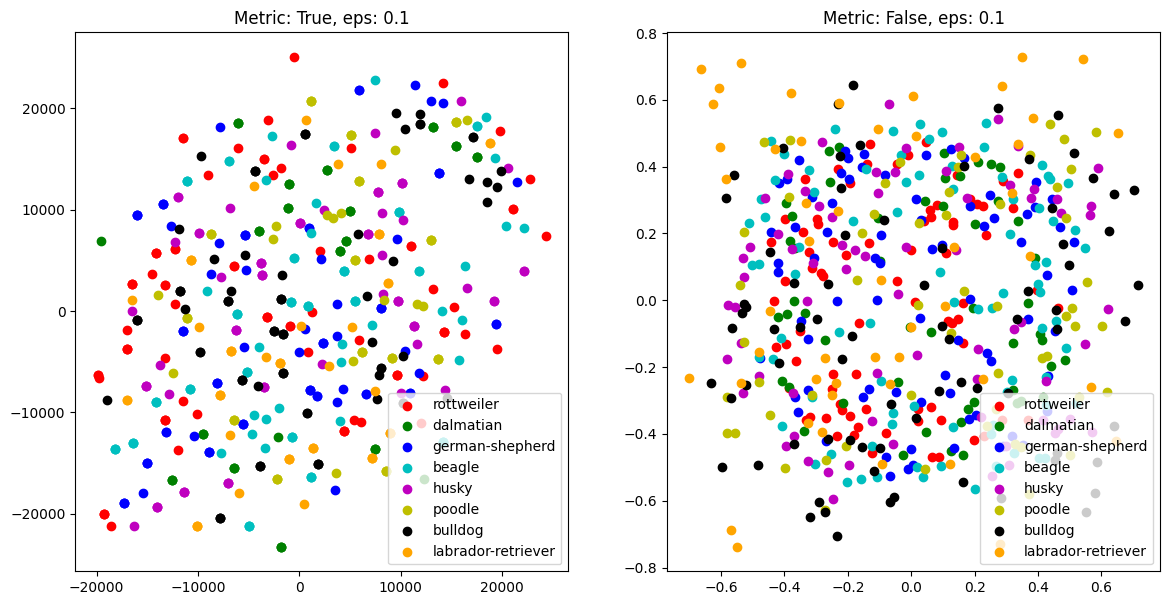

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


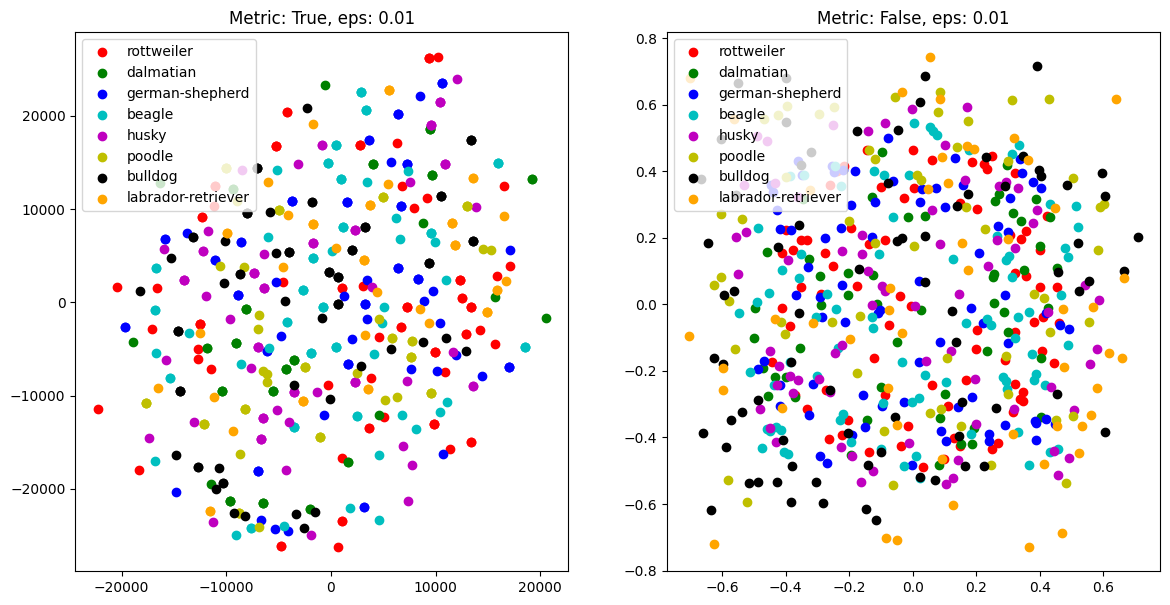

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


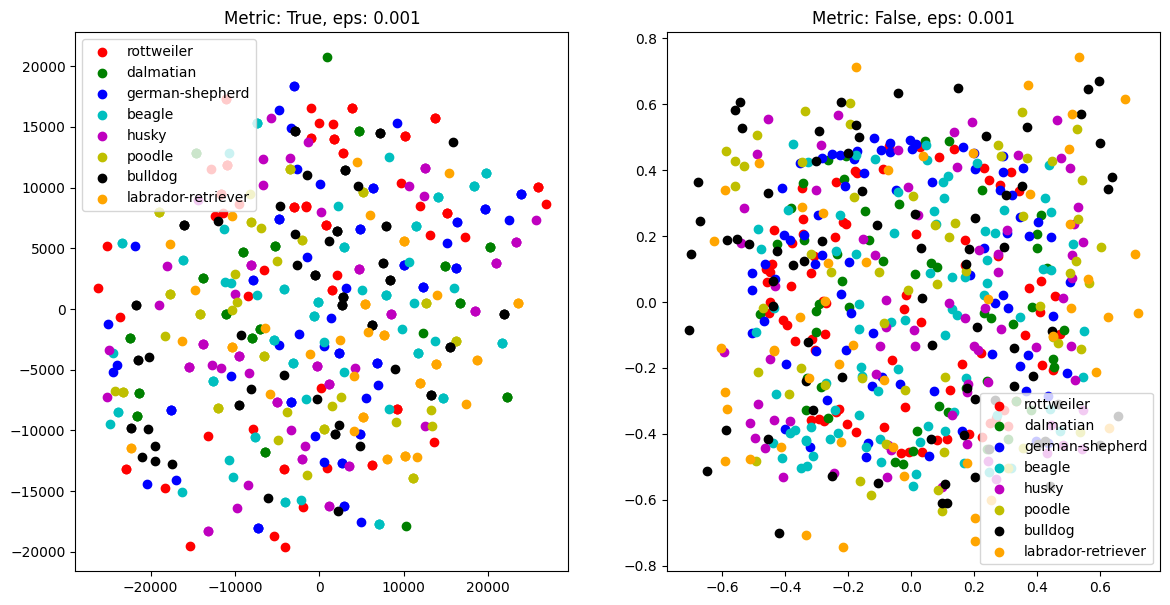

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


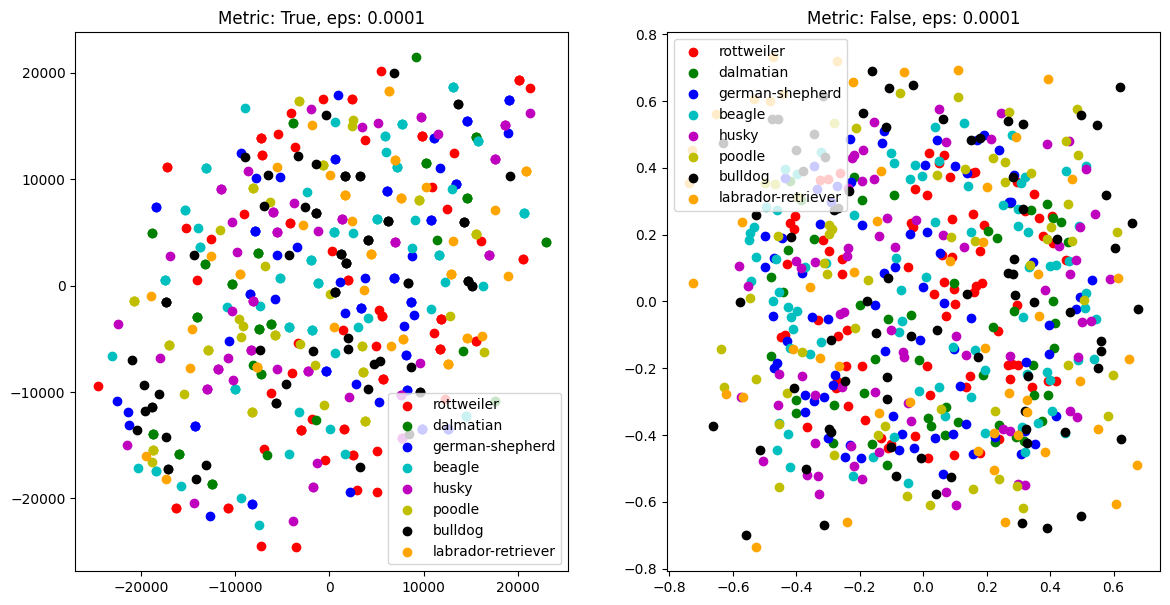

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


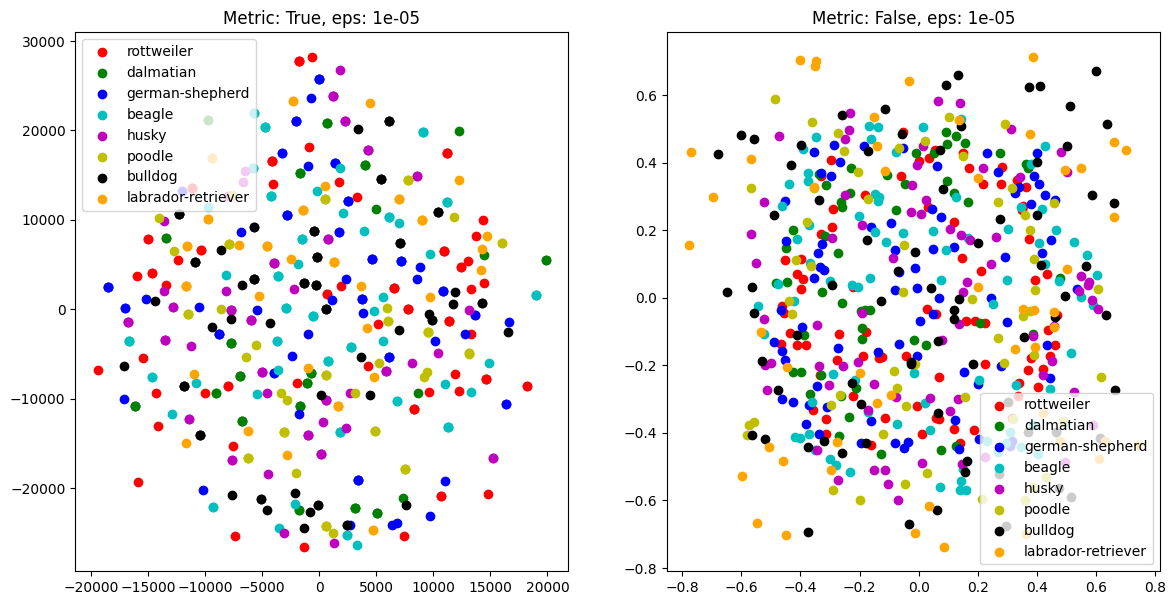

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


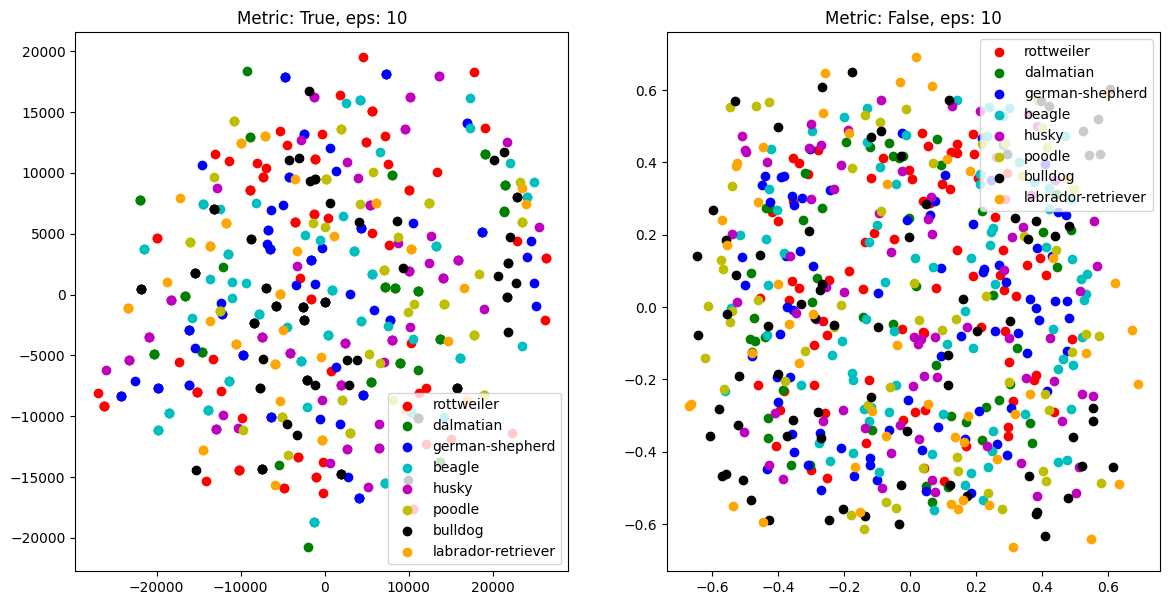

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


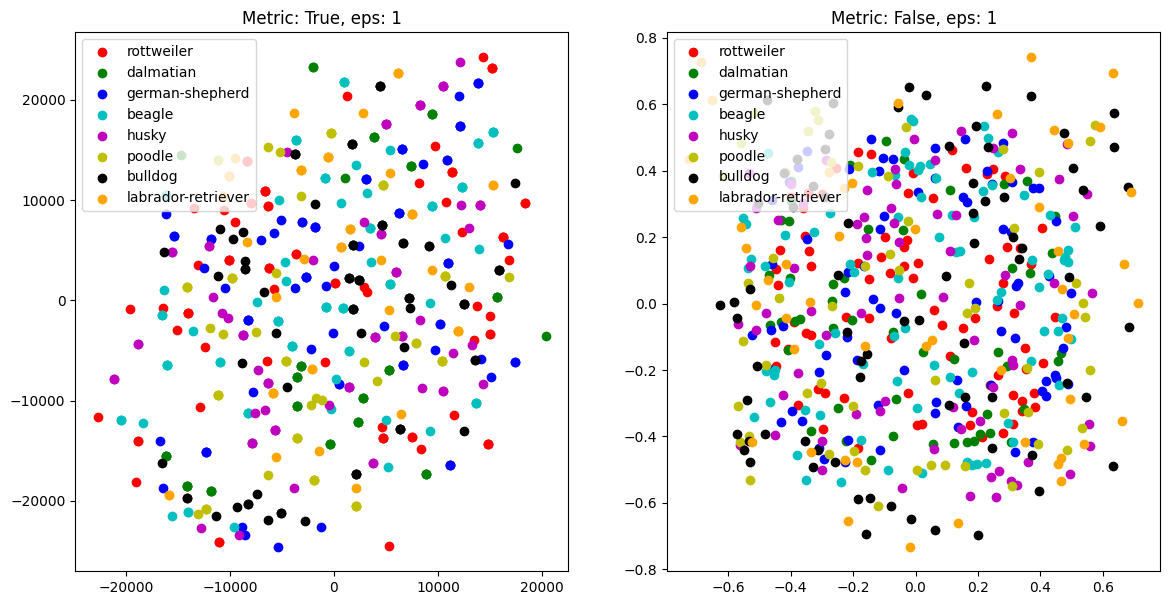

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


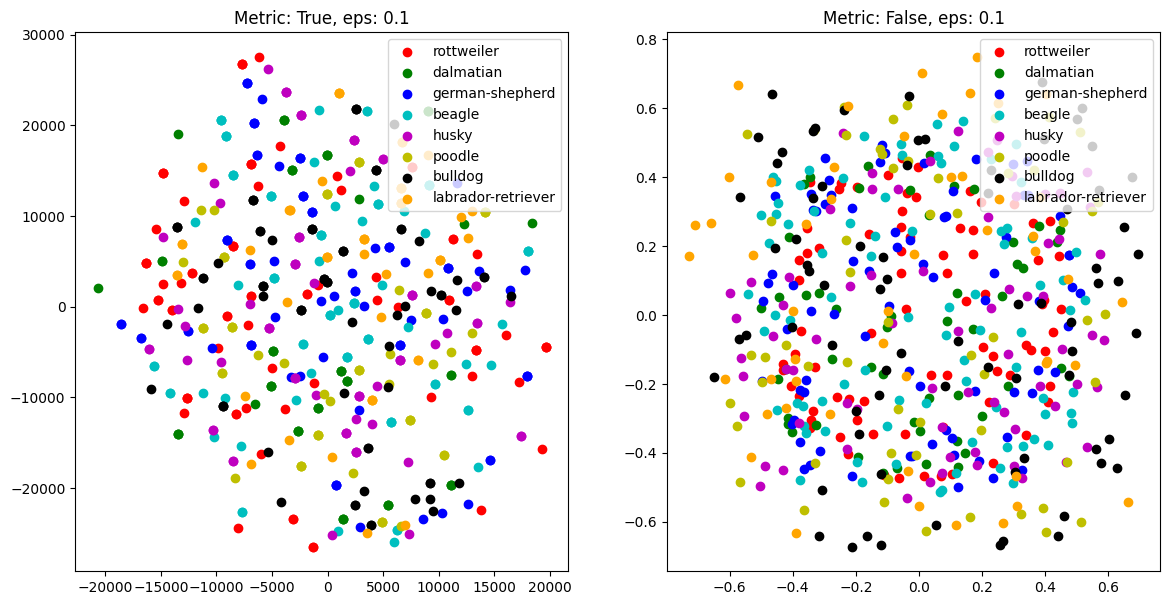

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


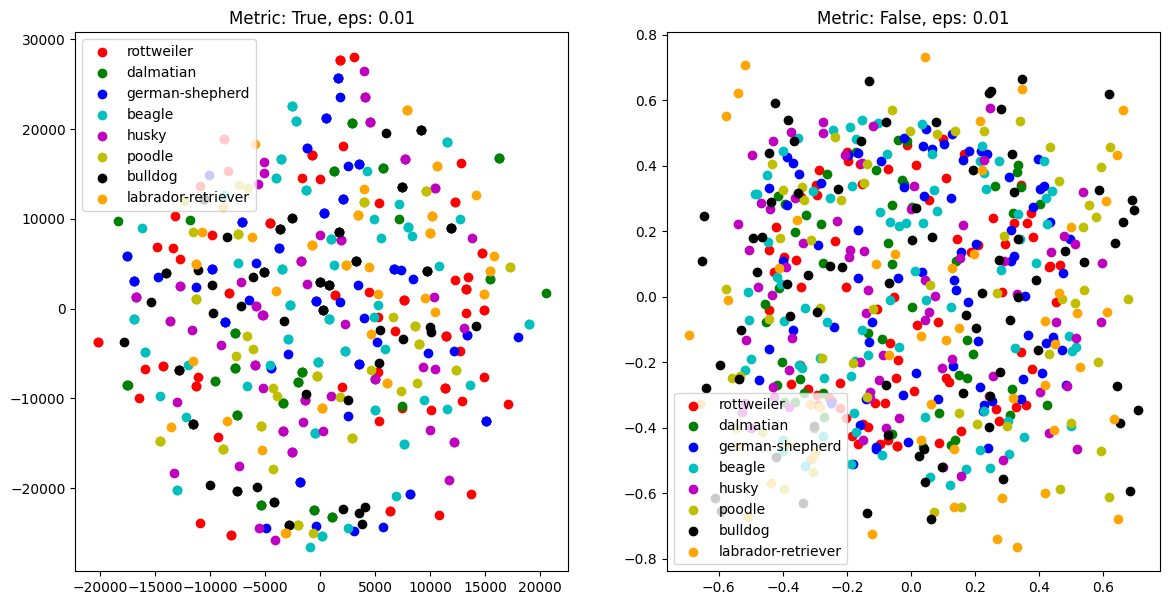

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


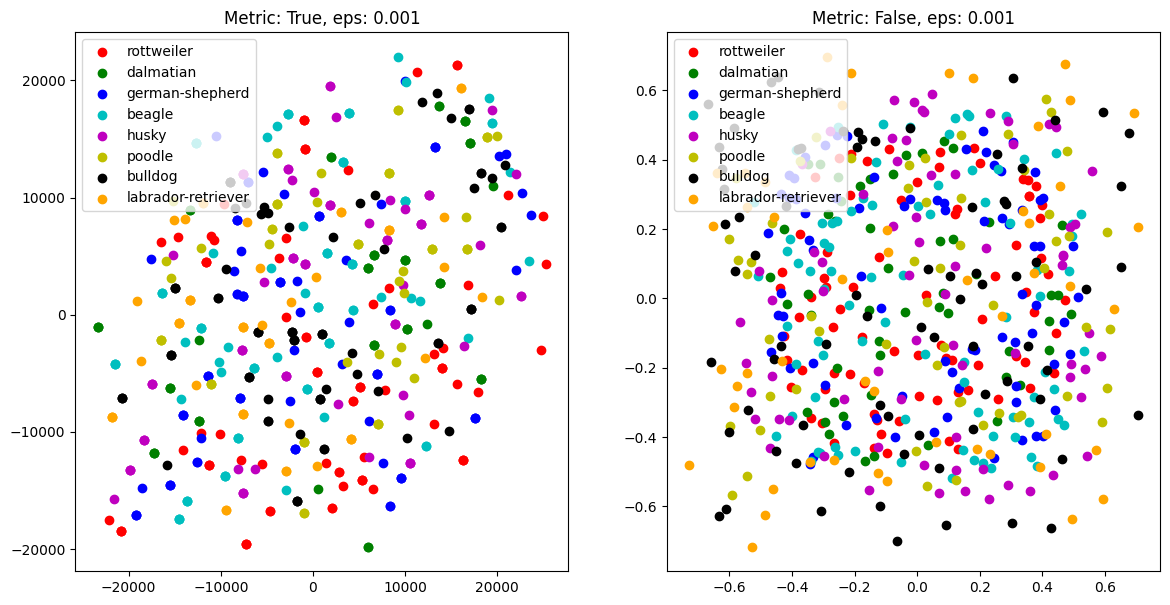

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


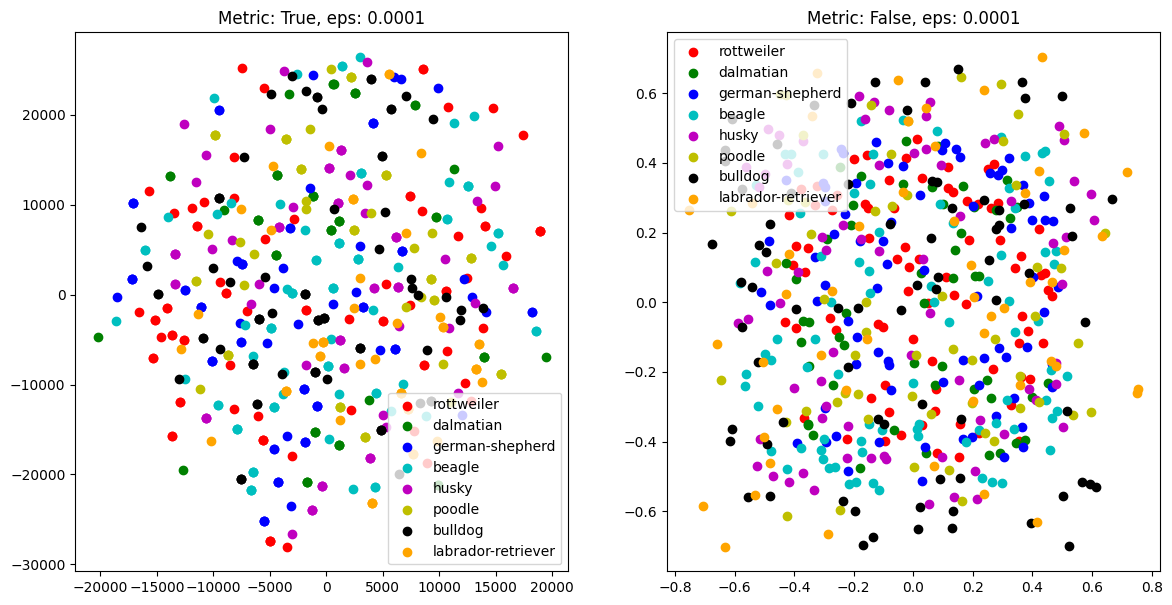

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


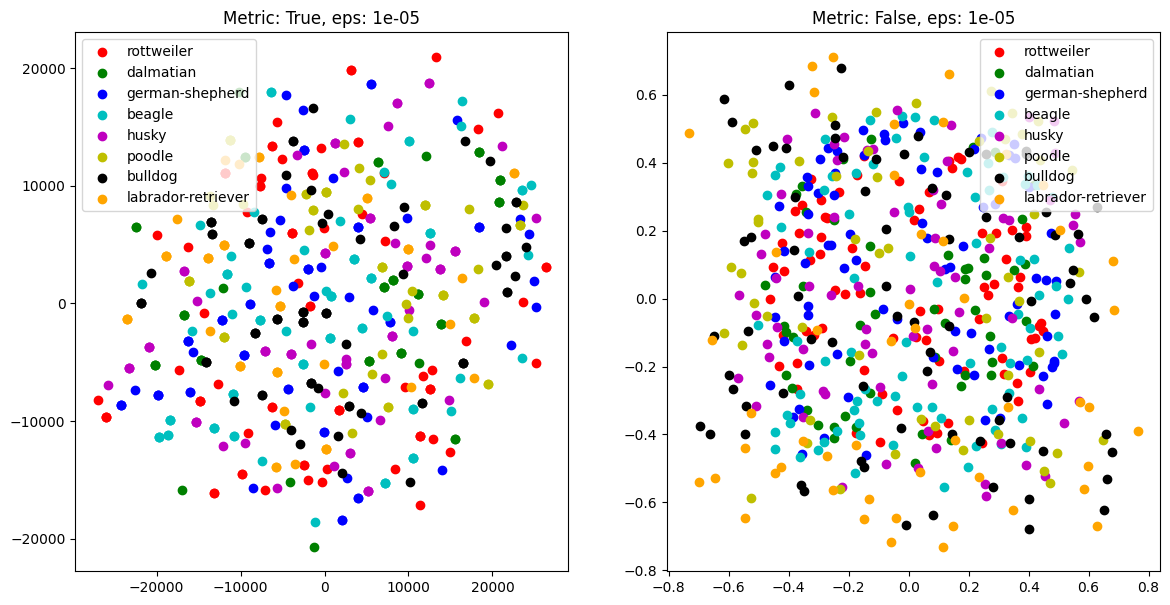

In [15]:
# List to store transformed data for different MDS configurations
transformed_data_list = []

eps_values = [10, 1, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5]

for metric_val in [True, False]:
    for eps_val in eps_values:
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))
        
        for i, (metric_val, ax) in enumerate(zip([True, False], axes)):
            mds = MDS(n_components=2, metric=metric_val, eps=eps_val)
            transformed_data = mds.fit_transform(images_for_mds)
            transformed_data_list.append((metric_val, eps_val, transformed_data))
            
            ax.set_title(f'Metric: {metric_val}, eps: {eps_val}')
            for point, label in zip(transformed_data, image_labels):
                color = label_to_color.get(label, 'gray')
                ax.scatter(point[0], point[1], c=color, label=label)
            
            handles, labels = ax.get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            ax.legend(by_label.values(), by_label.keys())
        
        plt.show()
        plt.close(fig)  

In [21]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

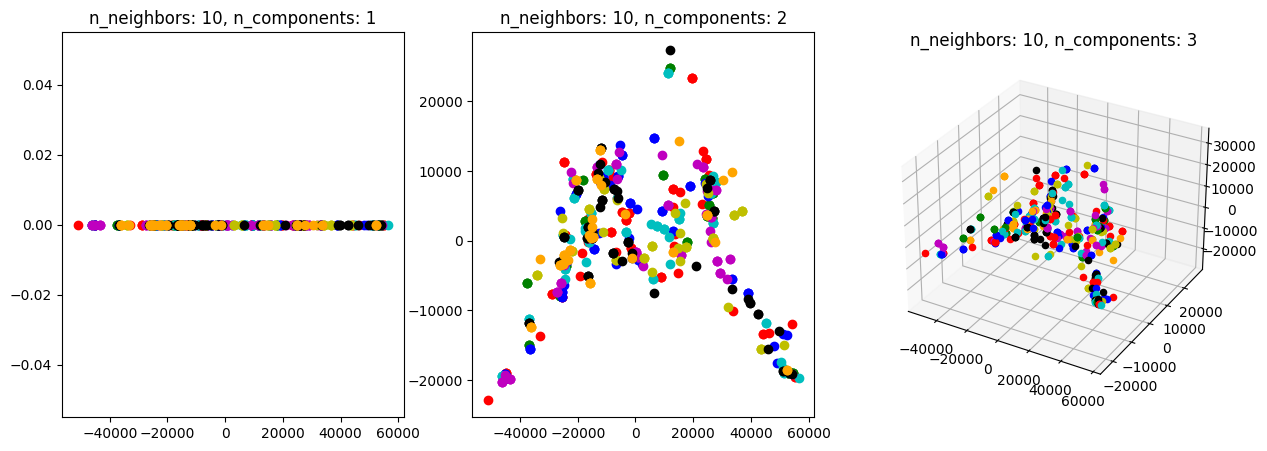

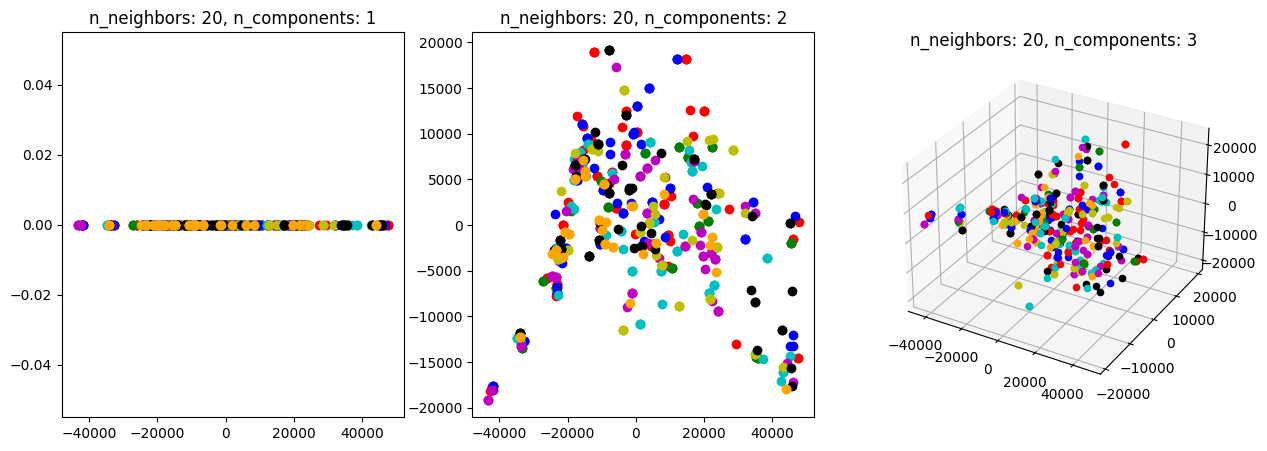

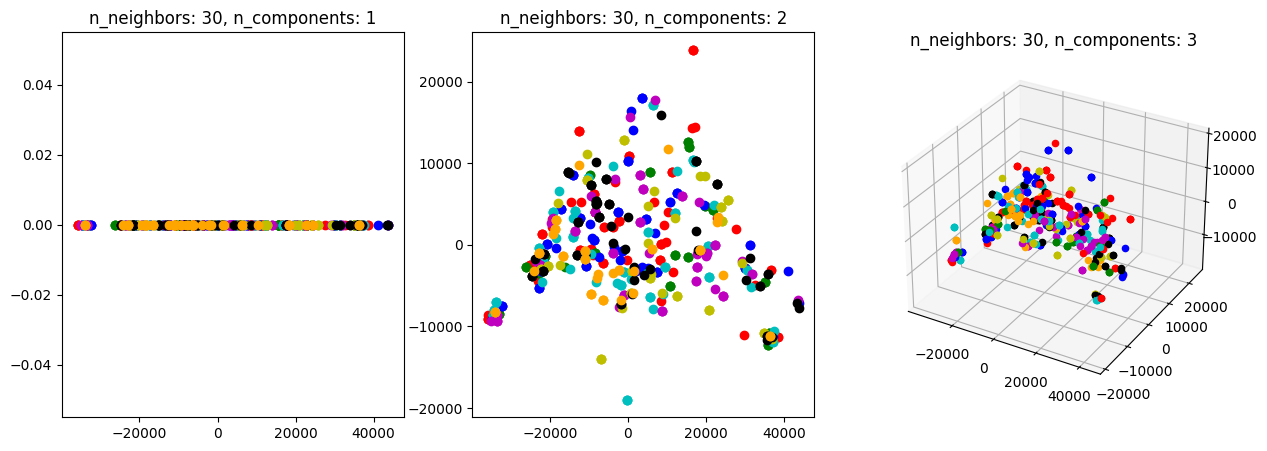

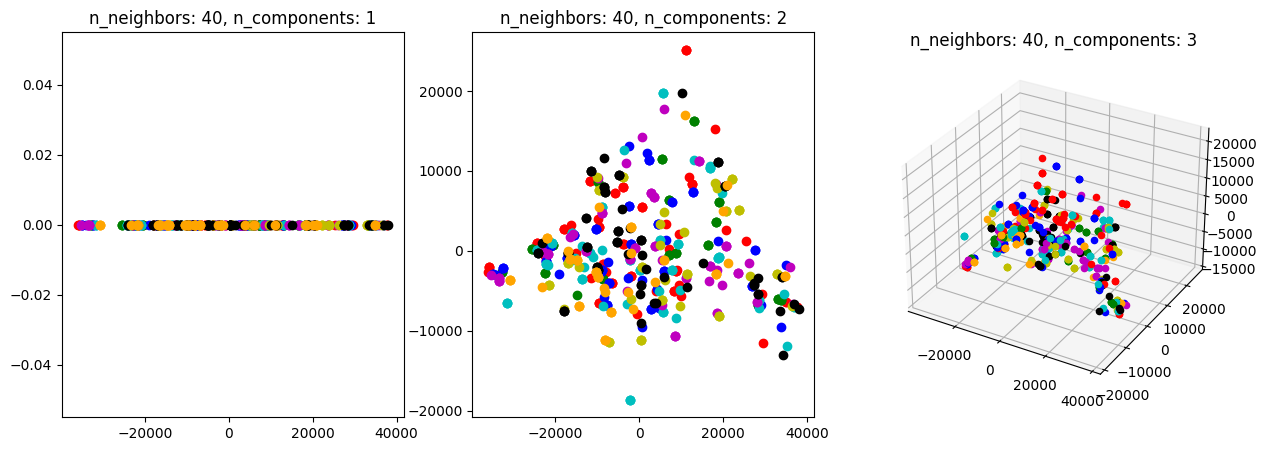

In [23]:
transformed_isomap_data_list = []

n_neighbors_values = [10, 20, 30, 40]
n_components_values = [1, 2, 3]

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # Isomap
        isomap = Isomap(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_isomap_data = isomap.fit_transform(images_for_mds)
        transformed_isomap_data_list.append((n_neighbors_val, n_components_val, transformed_isomap_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
            for point, label in zip(transformed_isomap_data, image_labels):
                color = label_to_color.get(label, 'gray')
                plt.scatter(point[0], 0, c=color, label=label)
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
            for point, label in zip(transformed_isomap_data, image_labels):
                color = label_to_color.get(label, 'gray')
                plt.scatter(point[0], point[1], c=color, label=label)
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  #3D subplot
            plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
            for point, label in zip(transformed_isomap_data, image_labels):
                color = label_to_color.get(label, 'gray')
                ax.scatter(point[0], point[1], point[2], c=color, label=label) 
        
    #handles, labels = ax.get_legend_handles_labels()
    #by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys())
    plt.show()


### Clustering of Breeds: 
The data points corresponding to specific breeds are not very well in forming distinct clusters, it suggests that the grayscale images of these breeds have similar patterns (in pixel space) which are difficult to distinguish using the manifold embedding. This could be due to shared backgrounds, poses, or color distributions in the original images, especially since they've been converted to grayscale.
### Dimensionality: 
The 1D and 2D embeddings might show significant overlap between breeds, indicating that these lower dimensions is not sufficient to capture the variance between different breeds. On the other hand, the 3D embeddings might offer a slightly better separation, but the clusters are still not distinct very much. 